##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

https://github.com/tensorflow/examples.git

In [11]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.configs import QuantizationConfig
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

AttributeError: module 'tensorflow_core.python.pywrap_tensorflow' has no attribute 'TFE_Py_RegisterJVPFunction'

Import the required packages.

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [6]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

228818944/228813984 [==============================] - 296s 1us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in github.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


Step 1.   Load input data specific to an on-device ML app. Split it to training data and testing data.

In [12]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

NameError: name 'image_path' is not defined

Step 2. Customize the TensorFlow model.

In [6]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
103/103 [==============================] - 10s 93ms/step - loss: 1.1384 - accuracy: 0.6093
Epoch 2/5
103/103 [==============================] - 6s 62ms/step - loss: 0.6709 - accuracy: 0.8813
Epoch 3/5
103/103 [==============================] - 6s 61ms/step - loss: 0.6265 - accuracy: 0.9110
Epoch 4/5
103/103 [======

Step 3. Evaluate the model.

In [7]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 2s 196ms/step - loss: 0.6291 - accuracy: 0.9183


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions.
You could download it in the left sidebar same as the uploading part for your own use.

In [8]:
model.export(export_dir='.')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpkectlxni/assets


INFO:tensorflow:Assets written to: /tmp/tmpkectlxni/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp24zuat56/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp24zuat56/labels.txt.


After this simple 4 steps, we could further use TensorFlow Lite model file and label file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.


## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

### Step 1: Load Input Data Specific to an On-device ML App

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

The dataset has the following directory structure:

<pre>
<b>flower_photos</b>
|__ <b>daisy</b>
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ <b>dandelion</b>
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ <b>roses</b>
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ <b>sunflowers</b>
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ <b>tulips</b>
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
</pre>

In [9]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

Use `ImageClassifierDataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [10]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [11]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

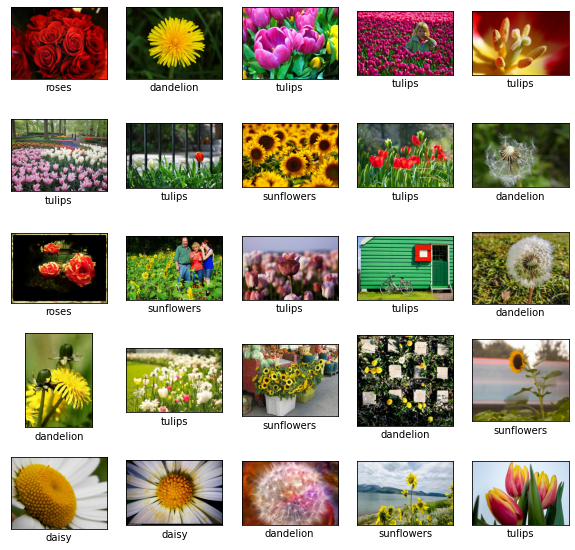

In [12]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [13]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 9s 101ms/step - loss: 1.1577 - accuracy: 0.5935 - val_loss: 0.6819 - val_accuracy: 0.8693
Epoch 2/5
91/91 [==============================] - 7s 78ms/step - loss: 0.6578 - accuracy: 0.9007 - val_loss: 0.6457 - val_accuracy: 0.8864
Epoch 3/5
91/91 [==============================] - 7s 78ms/step - loss: 0.6255 - acc

Have a look at the detailed model structure.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [15]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 2s 148ms/step - loss: 0.6341 - accuracy: 0.8937


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

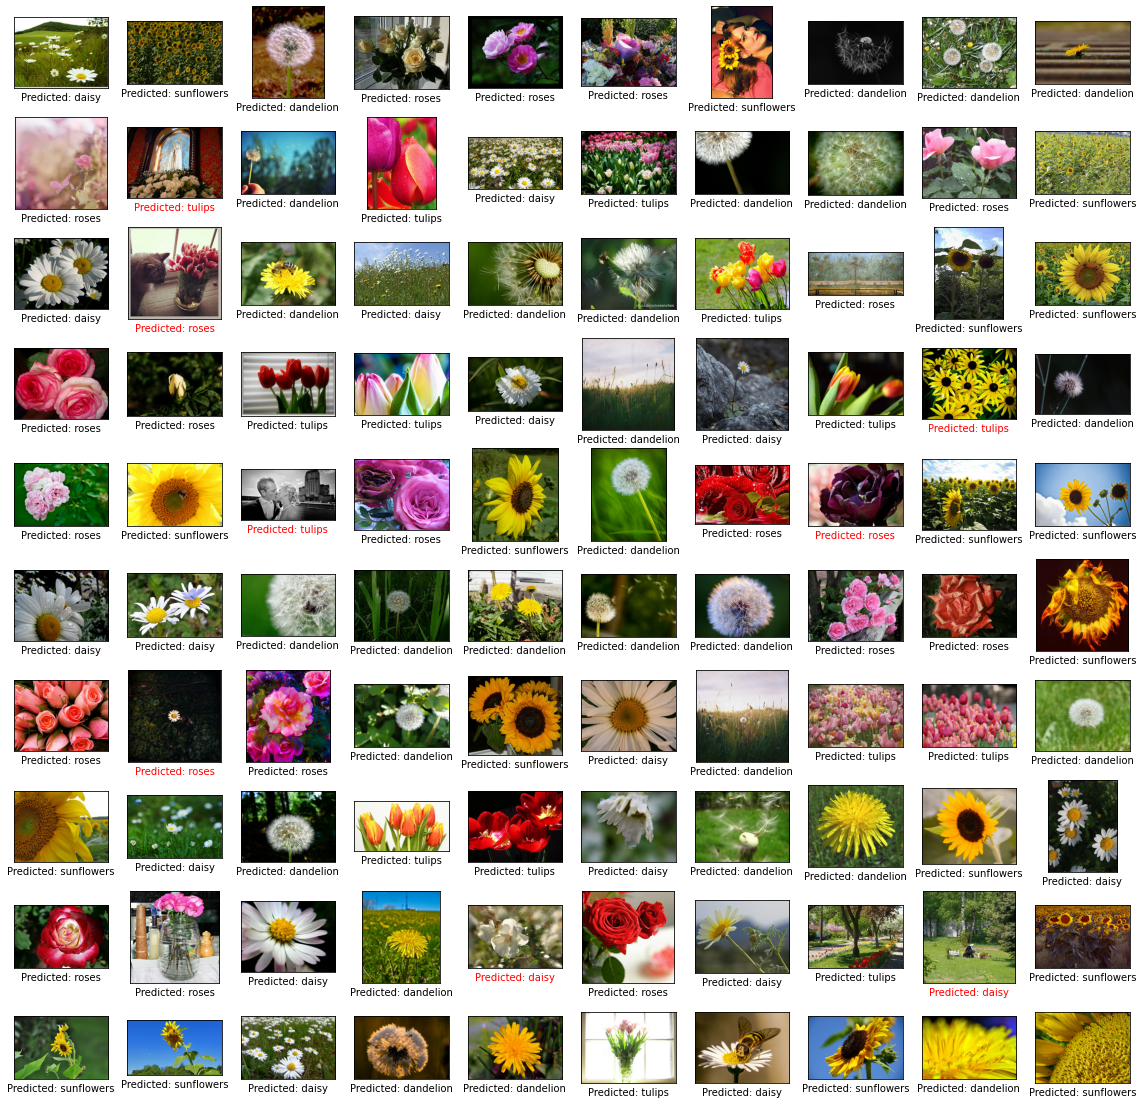

In [16]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the existing model to TensorFlow Lite model format and save the image labels in label file. The default TFLite filename is `model.tflite`, the default label filename is `label.txt`.

In [17]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpayfs_lst/assets


INFO:tensorflow:Assets written to: /tmp/tmpayfs_lst/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpg2hvw6va/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpg2hvw6va/labels.txt.


The TensorFlow Lite model file and label file could be used in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

As for android reference app as an example, we could add `flower_classifier.tflite` and `flower_label.txt` in [assets](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/android/app/src/main/assets) folder. Meanwhile, change label filename in [code](https://github.com/tensorflow/examples/blob/master/lite/examples/image_classification/android/app/src/main/java/org/tensorflow/lite/examples/classification/tflite/ClassifierFloatMobileNet.java#L65) and TensorFlow Lite file name in [code](https://github.com/tensorflow/examples/blob/master/lite/examples/image_classification/android/app/src/main/java/org/tensorflow/lite/examples/classification/tflite/ClassifierFloatMobileNet.java#L60). Thus, we could run the retrained float TensorFlow Lite model on the android app.


Here, we also demonstrate how to use the above files to run and evaluate the TensorFlow Lite model.

In [18]:
# Read TensorFlow Lite model from TensorFlow Lite file.
with tf.io.gfile.GFile('model.tflite', 'rb') as f:
  model_content = f.read()

# Initialze TensorFlow Lite inpterpreter.
interpreter = tf.lite.Interpreter(model_content=model_content)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

# Run predictions on each test image data and calculate accuracy.
accurate_count = 0
for i, (image, label) in enumerate(test_data.dataset):
    # Pre-processing should remain the same. Currently, just normalize each pixel value and resize image according to the model's specification.
    image, _ = model.preprocess(image, label)
    # Add batch dimension and convert to float32 to match with the model's input
    # data format.
    image = tf.expand_dims(image, 0).numpy()

    # Run inference.
    interpreter.set_tensor(input_index, image)
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the label with highest
    # probability.
    predict_label = np.argmax(output()[0])

    accurate_count += (predict_label == label.numpy())

accuracy = accurate_count * 1.0 / test_data.size
print('TensorFlow Lite model accuracy = %.4f' % accuracy)

TensorFlow Lite model accuracy = 0.8937


Note that preprocessing for inference should be the same as training. Currently, preprocessing contains normalizing each pixel value and resizing the image according to the model's specification. For  EfficientNet-Lite0, input image should be normalized to `[0, 1]` and resized to `[224, 224, 3]`.

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similiar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create`function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Post-training quantization on the TensorFLow Lite model



[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator latency, with little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker supports multiple post-training quantization options. Let's take full integer quantization as an instance. First, define the quantization config to enforce enforce full integer quantization for all ops including the input and output. The input type and output type are `uint8` by default. You may also change them to other types like `int8` by setting `inference_input_type` and `inference_output_type` in config.

In [19]:
config = QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

Then we export TensorFlow Lite model with such configuration.

In [20]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpsogv929i/assets


INFO:tensorflow:Assets written to: /tmp/tmpsogv929i/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpiyid_dn2/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpiyid_dn2/labels.txt.


In Colab, you can download the model named `model_quant.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to  `mobilenet_v2_spec` in `create` method.

In [21]:
model = image_classifier.create(train_data, model_spec=mobilenet_v2_spec, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 11s 118ms/step - loss: 1.1839 - accuracy: 0.6188 - val_loss: 0.7420 - val_accuracy: 0.8580
Epoch 2/5
91/91 [==============================] - 7s 77ms/step - loss: 0.7054 - accuracy: 0.8711 - val_loss: 0.7106 - val_accuracy: 0.8551
Epoch 3/5
91/91 [==============================] - 7s 77ms/step - loss: 0.6473 - ac

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [22]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 2s 150ms/step - loss: 0.6786 - accuracy: 0.8883


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of `ImageModelSpec` and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [23]:
inception_v3_spec = ImageModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ImageModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. For instance,


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: avoid overfitting.
*   `batch_size`: number of samples to use in one training step.
*   `validation_data`: number of samples to use in one training step.


For example, we could train with more epochs.


In [24]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
91/91 [==============================] - 9s 102ms/step - loss: 1.1284 - accuracy: 0.6183 - val_loss: 0.6934 - val_accuracy: 0.8693
Epoch 2/10
91/91 [==============================] - 7s 79ms/step - loss: 0.6679 - accuracy: 0.8852 - val_loss: 0.6606 - val_accuracy: 0.8750
Epoch 3/10
91/91 [==============================] - 7s 78ms/step - loss: 0.6308 - 

Evaluate the newly retrained model with 10 training epochs.

In [25]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 2s 149ms/step - loss: 0.6173 - accuracy: 0.8965
